# 1 - Perkenalan

Nama : Husain Tsabit Abdur Rahim

Batch : FTDS H8 016 - RMT

# 2 - Import Libraries

In [1]:
# libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting Data
from sklearn.model_selection import train_test_split

# Scaling and Encoding
from sklearn.preprocessing import StandardScaler, OrdinalEncoder 

# imbalance handling
from imblearn.over_sampling import SMOTENC

# metrics
from sklearn.metrics import classification_report

# Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

# saving and load model
import joblib
import json
from tensorflow.keras.models import load_model


import warnings
warnings.filterwarnings("ignore")

2022-12-02 15:53:18.254389: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 3 - Data Loading

## 3.1 Import Dataset

In [2]:
# import dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.T #showing dataset

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


## 3.2 Dataset Description

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

- Demographic info about customers – gender, age range, and if they have partners and dependents.

The description of each columns:

1. customerID : Customer ID
2. gender : Whether the customer is a male or a female
3. SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
4. Partner : Whether the customer has a partner or not (Yes, No)
5. Dependents : Whether the customer has dependents or not (Yes, No)
6. tenure : Number of months the customer has stayed with the company
7. PhoneService : Whether the customer has a phone service or not (Yes, No)
8. MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
12. DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract : The contract term of the customer (Month-to-month, One year, Two year)
17. PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges : The amount charged to the customer monthly
20. TotalCharges : The total amount charged to the customer
21. Churn : Whether the customer churned or not (Yes or No)
 

## 3.3 Duplicate Dataset 

In [3]:
# Duplicate dataset
data_copy = data.copy()

## 3.4 Data Information

In [4]:
# check information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


the data consists of 7043 rows and 21 columns, the data consists of numeric and categorical data. Because the `total charges` column contains numeric values ​​but in Data type is object, so I will change the data type into float.


In [5]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [6]:
# check information of dataset after change the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 3.5 Data Statistic

In [7]:
# show statictical dataset
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


results from the statistical numeric dataset:

1. the total of citizen who is using telco company product is 7043

2. the average number of months based on customers who have stayed with the company is 32 months, with the longest number of months being 72 months.

3. the average amount charged to customers every month is USD 64.76, with a minimum amount of USD 18.25, and a maximum amount of USD 118.75

4. the average total charged of each customers every month is USD 2283.3, with a minimum amount of USD 18.8, and a maximum amount of USD 8684.8

## 3.6 Convert feature churn into numerical data

In [8]:
# Modeling cannot train categorical data so data labels need to be converted to numeric data
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [9]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


# 4 - Exploratory Data Analyt (EDA)

## 4.1 Gender Comparing in Customer

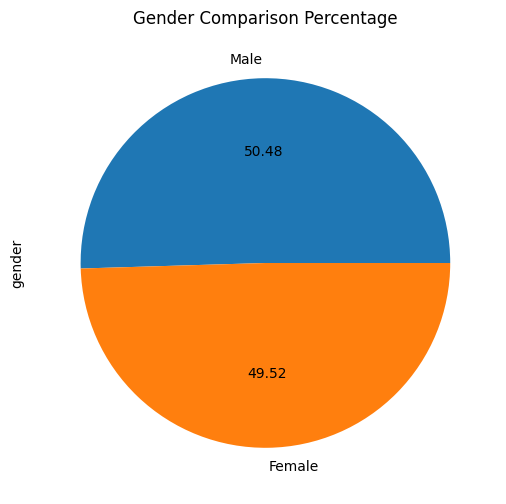

In [10]:
# total male and female in visualization
data['gender'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%.2f')
plt.title('Gender Comparison Percentage')
plt.show()

we can see, the total number of customers by gender is almost equal with a difference of 0.48 percent.

## 4.2 Average tenure of customers

In [11]:
# view the average tenure of customers churn
data[data['Churn'] == 1]['tenure'].mean()

17.979133226324237

In [12]:
# view the average tenure of staying customers
data[data['Churn'] == 0]['tenure'].mean()

37.56996521066873

The average length of time of customers leaves a Telco company is 17.9 months, and the average longevity of customers from Telco companies is 37.5 months

## 4.3 The average monthly charges of customers churn

In [13]:
# view the average MonthlyCharges of customers churn
data[data['Churn'] == 1]['MonthlyCharges'].mean()

74.44133226324237

In [14]:
# view the average MonthlyCharges of staying customers
data[data['Churn'] == 0]['MonthlyCharges'].mean()

61.26512369540008

average monthly cost of each leaving customer is USD 74.4, and the average monthly cost of each staying customer is USD 61.2, Maybe one of the causes of leaving customers is because the monthly charges are more expensive when compared to customers who don't leave.


## 4.4 Average of total charges customers churn

In [15]:
# view the average TotalCharges of customers churn
data[data['Churn'] == 1]['TotalCharges'].mean()

1531.7960941680042

In [16]:
# view the average TotalCharges of staying customers
data[data['Churn'] == 0]['TotalCharges'].mean()

2555.344141003293

the average of total charges of each leaving customer is USD 1531.7, and the average of total charges for each staying customer is USD 2555.3, although the average total cost paid by surviving customers is higher than leaving customers, they are loyal to the company.


## 4.5 Check total target by percentage 

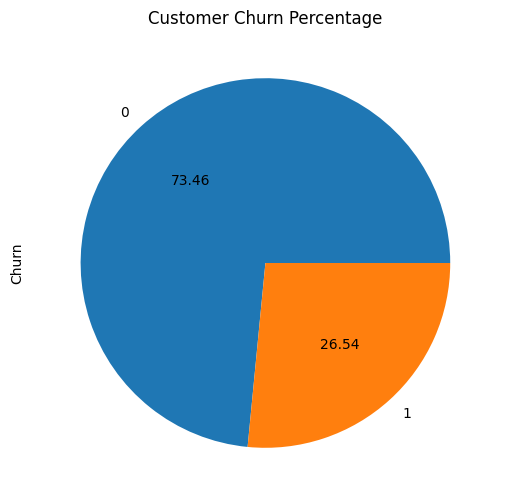

In [17]:
# total male and female in visualization
data['Churn'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%.2f')
plt.title('Customer Churn Percentage')
plt.show()

the number of labels on the target has unequal number, or imbalanced data is detected. Data labeled 'Yes' or 1 is only 26.54% of the total data, so in the preprocessing step i used to handle imbalance data.

## 4.6 number of users using tech support services based on customer type (staying or leaving)

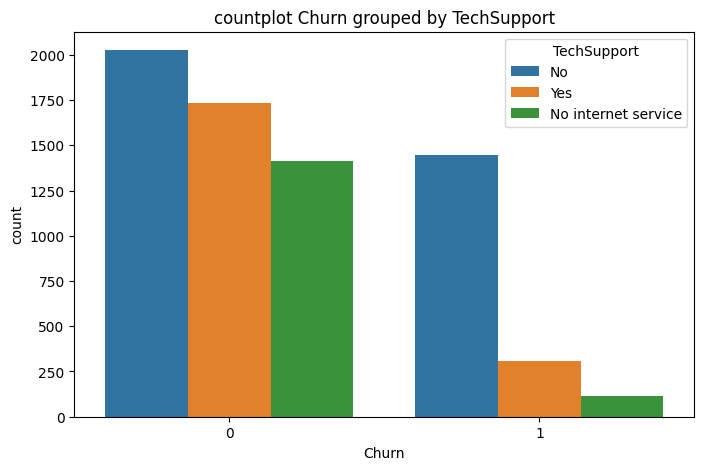

In [18]:
# Create plots

plt.figure(figsize=(8, 5))

# plt.subplot(1,2,1)
sns.countplot(x=data['Churn'],hue=data['TechSupport'])
plt.title('countplot Churn grouped by TechSupport')

plt.show()

of the two types of customers above, the number of customers who do not use tech support services is always more than those who use tech support services to help solve their problems. based on personal judgment that the customer who left was desperate with the existing problem, but was reluctant to contact the tech support service. Because it can be seen that the number of customers who stayed mostly used tech support services.

## 4.7 Check missing values

In [19]:
# finding missing values in each columns
missing = data.isnull().sum()

# finding the percentage of missing values
missing_pct = round(data.isnull().sum()/len(data) * 100, 1)

data_missing = pd.concat([missing, missing_pct], axis=1)
data_missing.columns = ["Num", "Pct"]
print(data_missing)


                  Num  Pct
customerID          0  0.0
gender              0  0.0
SeniorCitizen       0  0.0
Partner             0  0.0
Dependents          0  0.0
tenure              0  0.0
PhoneService        0  0.0
MultipleLines       0  0.0
InternetService     0  0.0
OnlineSecurity      0  0.0
OnlineBackup        0  0.0
DeviceProtection    0  0.0
TechSupport         0  0.0
StreamingTV         0  0.0
StreamingMovies     0  0.0
Contract            0  0.0
PaperlessBilling    0  0.0
PaymentMethod       0  0.0
MonthlyCharges      0  0.0
TotalCharges       11  0.2
Churn               0  0.0


from the dataset above, there is missing values in each columns, so i'm going to handle the missing values in preprocessing step.

# 5 - Data Preprocessing

## 5.1 Feature Selection

In [20]:
# Display X_train

data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


from the the personal judgement column `customerID` is useless because our focus on this project is customer churn, and every customer have difference customer id, if still keep the customer id column it will cause cardinality and that is not good for the data.

In [21]:
# Drop column yang tidak digunakan 
data.drop(['customerID'],axis=1, inplace=True)


## 5.1 Get Data for Model Inference

In [22]:
# Get Data for Model Inference

data_inf = data.sample(100, random_state=28)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4243,Female,0,No,Yes,40,Yes,No,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),64.10,2460.35,0
6141,Male,1,Yes,No,52,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.20,5568.35,1
5825,Male,1,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,70.30,1
3677,Female,0,No,No,1,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Mailed check,30.55,30.55,0
2117,Female,0,Yes,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),64.45,4528.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5292,Male,0,No,No,46,No,No phone service,DSL,No,No,Yes,Yes,No,No,One year,No,Credit card (automatic),33.70,1537.85,0
3359,Male,0,No,No,21,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.95,416.40,0
4797,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8289.20,0
5182,Male,0,No,No,12,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),24.95,280.40,0


In [23]:
# Remove Inference Set from Dataset

data_train_test = data.drop(data_inf.index)

In [24]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## 5.2 Splitting between `X` and `y`

In [25]:
# Splitting between `X` and `y`

X = data_train_test.drop('Churn', axis=1)
y = data_train_test['Churn']

## 5.3 Splitting between Train-set, Val-set, and Test-set


In [26]:
# split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

# split data train dan data val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=28)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (4443, 19)
Val Size :  (1111, 19)
Test Size :  (1389, 19)


we can see the result of splitting data above. Data Train consist of 5015 rows and 20 columns, data Val consist of 886 rows and 20 columns, and data Test consist of 1042 rows and 20 columns.

## 5.4 Handling Missing Values

In [27]:
# Check Missing Values on X_train

X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        6
dtype: int64

In [28]:
# Check Missing Values on X_train

X_val.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [29]:
# Check Missing Values on X_test

X_test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64

In [30]:
# replace missing value TotalCharges
X_train['TotalCharges'].fillna(X_train['TotalCharges'].median(), inplace=True)
X_val['TotalCharges'].fillna(X_val['TotalCharges'].median(), inplace=True)
X_test['TotalCharges'].fillna(X_test['TotalCharges'].median(), inplace=True)

In [31]:
# Check Missing Values after handling

X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

## 5.5 Handling Outlier

first of all, i'll check the distribution of the data, if outliers are found, only the data train will be handled, therefore it will only be checked on the X-train.

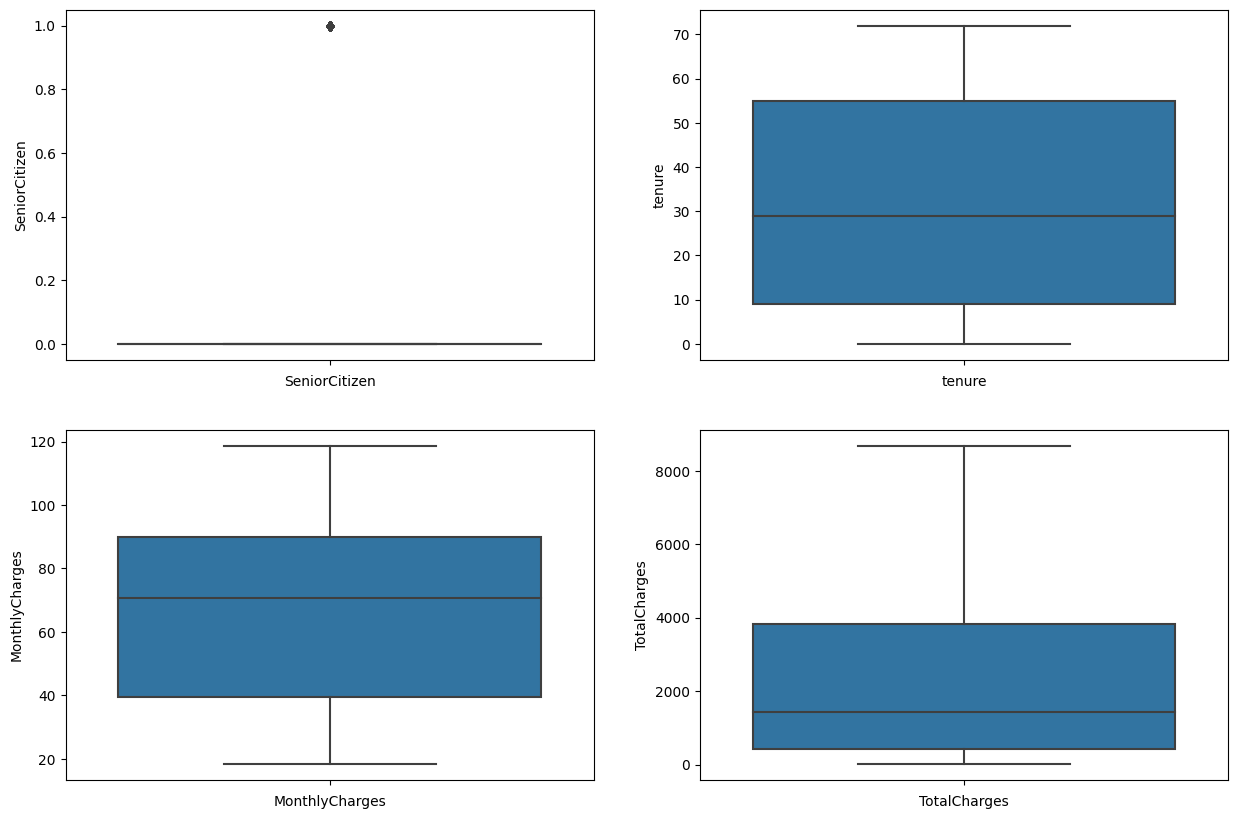

In [32]:
# definisikan kolom numerik
cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# definisikan besar figsize
plt.figure(figsize=(15,10))

# buat looping untuk boxplot kolom
for i, col in enumerate(cols):
    if X_train[col].dtype != 'object':
        ax = plt.subplot(2, 2, i+1)
        sns.boxplot(y=X_train[col])
        plt.xlabel(col)
        
plt.show()

From the boxplot above, we can see there is no outliers in the data X_train, so there is no need to handle outliers. The Senior citizen feature is not an outlier, but the data is a feature that belongs to a category but in numerical form.

## 5.7 Get Numerical Columns and Categorical Columns

In [33]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [34]:
# for X-train numeric and categoric
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

# for X-validation numeric and categoric
X_val_num = X_val[num_columns]
X_val_cat = X_val[cat_columns]

# untuk X-test numeric and categoric
X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

## 5.8 Handling imbalace data with scaling and encoding

Because the handling of data imbalance is only done on the X-train, so for the X-val and X-test only scaling is done and not SMOTENC. The reason using SMOTENC for handling imbalance dataset because SMOTE-NC for dataset containing numerical and categorical features.

In [35]:
# define scaler
scaler = StandardScaler()

In [36]:
# x-train num scaling
scaler.fit(X_train_num)
X_train_imbalanced_num = scaler.transform(X_train_num)
# X-val num scaling
X_val_scaled = scaler.transform(X_val_num)
# X-test num scaling
X_test_scaled = scaler.transform(X_test_num)

In [37]:
# concate between numeric data scaled and categorical data before encoding
X_train_imbalanced_new = np.concatenate([X_train_imbalanced_num, X_train_cat], axis=1)

# Display X-train final in dataframe
X_train_imbalanced_new_df = pd.DataFrame(X_train_imbalanced_new, columns=[num_columns + cat_columns])
X_train_imbalanced_new_df.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-0.445582,-0.384683,-0.371263,-0.476545,Female,Yes,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check
1,-0.445582,-1.286346,-0.716282,-0.99757,Female,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic)
2,2.244256,-1.286346,0.303702,-0.984098,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,-0.445582,-0.384683,0.461138,-0.227802,Female,No,No,Yes,No,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check
4,-0.445582,0.598951,-1.500113,-0.598594,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check


In [38]:
# definisikan smotenc dan kolom categori
smotenc = SMOTENC([4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], random_state = 23)
# doing SMOTENC methods for data train
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_imbalanced_new, y_train)
# showing the total target
y_train_balanced.value_counts()

0    3261
1    3261
Name: Churn, dtype: int64

After successfully handling balance, separate the numeric and category columns again for endcoding to the category.

In [39]:
# convert data balanced to dataframe
X_train_balanced_df = pd.DataFrame(X_train_balanced, columns=[num_columns + cat_columns])

# for X-train-balanced
X_train_balance_num = X_train_balanced_df[num_columns]
X_train_balance_cat = X_train_balanced_df[cat_columns]

Encoding the category data

In [40]:
# define encoder
encoder = OrdinalEncoder()

In [41]:
# x-train cat encoding
encoder.fit(X_train_balance_cat)

X_train_balance_encoded = encoder.transform(X_train_balance_cat)
# X-val num encode
X_val_encoded = encoder.transform(X_val_cat)
# X-test num encode
X_test_encoded = encoder.transform(X_test_cat)

After scaling and encoding, the numeric and categorical data will be combined again and made into a data frame.

In [42]:
# concate X-train final
X_train_final = np.concatenate([X_train_balance_num, X_train_balance_encoded], axis=1)
# concate X-val final
X_val_final = np.concatenate([X_val_scaled, X_val_encoded], axis=1)
# concate X-test final
X_test_final = np.concatenate([X_test_scaled, X_test_encoded], axis=1)

In [43]:
# change X-train, X-val and X-test final into dataframe
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_val_final_df = pd.DataFrame(X_val_final, columns=[num_columns + cat_columns])
X_test_final_df = pd.DataFrame(X_test_final, columns=[num_columns + cat_columns])

X_train_final_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-0.445582,-0.384683,-0.371263,-0.476545,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0
1,-0.445582,-1.286346,-0.716282,-0.99757,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.244256,-1.286346,0.303702,-0.984098,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3,-0.445582,-0.384683,0.461138,-0.227802,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0
4,-0.445582,0.598951,-1.500113,-0.598594,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6517,-0.445582,-1.286346,0.321556,-0.983862,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
6518,-0.445582,-1.218516,-0.503346,-0.958264,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
6519,-0.445582,-1.170075,-0.024299,-0.900118,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,2.0
6520,-0.445582,-1.282864,-1.511339,-1.007497,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0


Reference for handling imbalance data from the P1W3D3PM Advance feature engineering material 

source : `https://colab.research.google.com/github/ardhiraka/FSDS_Guidelines/blob/master/p1/v3/w3/P1W3D3PM%20-%20Advance%20Feature%20Engineering.ipynb#scrollTo=VE7xf-P9qoup`


# 6 - Creating Model

## 6.1 Input Pipeline

In [44]:
# Create training dataset
#train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train))
#train_dataset = train_dataset.batch(64)

# Create val dataset
#val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val))
#val_dataset = val_dataset.batch(64)

# Create test dataset
#test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, y_test))
#test_dataset = test_dataset.batch(64)

Previously, the data was in the form of numpy arrays and when I wanted to create a pipeline (changed to tensor) an error occurred. Therefore changing the data type so that X-train, X-val and X-test data can be converted into tensors. ref https://stackoverflow.com/questions/58636087/tensorflow-valueerror-failed-to-convert-a-numpy-array-to-a-tensor-unsupporte

In [45]:
X_train_final = np.asarray(X_train_final).astype(np.float32)
X_val_final = np.asarray(X_val_final).astype(np.float32)
X_test_final = np.asarray(X_test_final).astype(np.float32)

In [46]:
# Create training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train_balanced)).batch(64)

# Create val dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val)).batch(64)

# Create test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, y_test)).batch(64)

2022-12-02 15:53:29.371096: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 6.2 Sequential API

### 6.2.1 Model Definition

In [47]:
# Create Sequential API

model_seq = Sequential()
# Hidden layer 1
model_seq.add(Dense(4, activation='relu', input_shape=(19,))) 
model_seq.add(Dense(1, activation='sigmoid')) # Output layer

# Compile
model_seq.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

# summary from model
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 80        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


For the sequential baseline model, I use one hidden layer with 4 neurons where the hidden layer receives as much as 19 features as input. The activation functions chosen are Relu and Sigmoid because they are the most widely used activation functions. The output of this sequential model is 1 neuron where the neuron will produce the classification results.


In [48]:
# Plot Layers
tf.keras.utils.plot_model(model_seq, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


The visual above shows the architectural structure of our model where there is an InputLayer with 19 features which will lead to a hidden layer with 4 neurons and lastly the neurons from the hidden layer will lead to an output layer which contains 1 neuron.


### 6.2.2 Model Training

In [49]:
# Train the model

history_seq = model_seq.fit(train_dataset, validation_data=(val_dataset), epochs=10)

Epoch 1/10
102/102 [==============================] - 1s 2ms/step - loss: 0.7309 - accuracy: 0.5115 - val_loss: 0.6583 - val_accuracy: 0.6634
Epoch 2/10
102/102 [==============================] - 0s 1ms/step - loss: 0.6451 - accuracy: 0.6708 - val_loss: 0.6260 - val_accuracy: 0.7030
Epoch 3/10
102/102 [==============================] - 0s 1ms/step - loss: 0.6033 - accuracy: 0.7130 - val_loss: 0.6081 - val_accuracy: 0.6985
Epoch 4/10
102/102 [==============================] - 0s 1ms/step - loss: 0.5705 - accuracy: 0.7366 - val_loss: 0.5921 - val_accuracy: 0.7093
Epoch 5/10
102/102 [==============================] - 0s 1ms/step - loss: 0.5454 - accuracy: 0.7485 - val_loss: 0.5758 - val_accuracy: 0.7354
Epoch 6/10
102/102 [==============================] - 0s 4ms/step - loss: 0.5269 - accuracy: 0.7545 - val_loss: 0.5622 - val_accuracy: 0.7435
Epoch 7/10
102/102 [==============================] - 0s 1ms/step - loss: 0.5139 - accuracy: 0.7616 - val_loss: 0.5523 - val_accuracy: 0.7462
Epoch 

### 6.2.3 Model Evaluation

In [50]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.730870,0.511500,0.658343,0.663366
1,0.645070,0.670807,0.625992,0.702970
2,0.603268,0.712972,0.608107,0.698470
3,0.570501,0.736584,0.592060,0.709271
4,0.545424,0.748543,0.575762,0.735374
5,0.526912,0.754523,0.562195,0.743474
6,0.513872,0.761576,0.552287,0.746175
7,0.504691,0.765716,0.545785,0.747975
8,0.498537,0.769549,0.541332,0.747975
9,0.494269,0.769396,0.538186,0.747075


<AxesSubplot: >

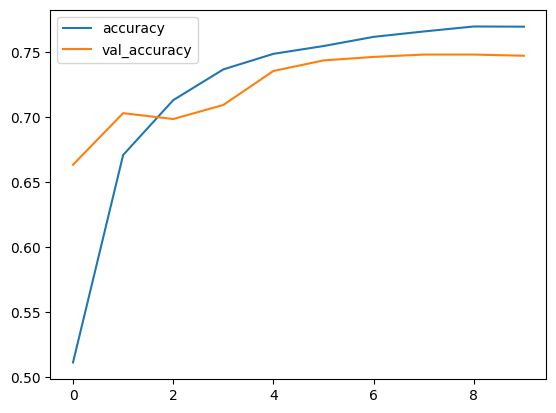

In [51]:
# Plot between accuracy and val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

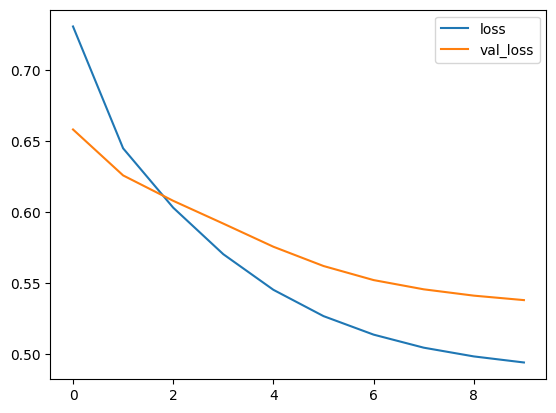

In [52]:
# Plot between loss and val_loss

history_seq_df[['loss', 'val_loss']].plot()

In [53]:
# predict data train
y_pred_func = model_seq.predict(X_train_final)
# set threshold 0.5
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)
# result from classification report
print(classification_report(y_train_balanced, y_pred_func))

204/204 [==============================] - 0s 742us/step
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      3261
           1       0.75      0.83      0.79      3261

    accuracy                           0.78      6522
   macro avg       0.78      0.78      0.77      6522
weighted avg       0.78      0.78      0.77      6522



In [54]:
# prediksi data test
y_pred_sq_test = model_seq.predict(X_test_final)
# set threshodl 0.5
y_pred_sq_test = np.where(y_pred_sq_test >= 0.5, 1, 0)
# result from classification report
print(classification_report(y_test, y_pred_sq_test))

44/44 [==============================] - 0s 834us/step
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1022
           1       0.52      0.77      0.63       367

    accuracy                           0.76      1389
   macro avg       0.71      0.76      0.72      1389
weighted avg       0.80      0.76      0.77      1389



Churn is an event where a customer disconnects from our company, therefore our goal is to minimize the churn rate. I think we have to focus more on label 0 where label 0 is someone who doesn't churn and we have to be able to keep these customers from breaking up with the company while being able to find new customers. By focusing on the 0 label, we can better target promos or new features or services to surviving customers so that they stay afloat and don't churn.

- From the classification report results, the accuracy between the data train is 76% and the test is 72% with a non-significant difference. The difference only reaches 4% so that it can be said that the model created has good fit with the architecture using the default activation function on each hidden layer.
- Precision: So out of 1022 customers who didn't churn, we managed to classify 92% of the customers as really not churn and and wrongly classified the remaining 8% as churn customers even though they shouldn't have.
- Recall: So out of 1022 customers who didn't churn, we managed to classify 68% of the customers as really not churn and wrongly classify 32% who should be churn but we think of them as not churn.
- Just as a loss graph can change if it is re-run, there is a possibility that there will be a change in the value of the classification report because these results come from the previous train model.

## 6.3 Functional API

### 6.3.1 Model Definition

In [55]:
input_layer = Input(shape=(19,)) # input layer
hidden_layer = Dense(4, activation='relu')(input_layer) # hidden layer 1
output_layer = Dense(1, activation='sigmoid')(hidden_layer) # Output layer

model_func = Model(inputs=input_layer, outputs=output_layer)

# compile model
model_func.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense_2 (Dense)             (None, 4)                 80        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


For the baseline functional model I use the same architecture as the sequential model where I use one hidden layer with 4 neurons where the hidden layer receives as much as 19 features as input and this hidden layer will lead to the output layer. The output of this sequential model is 1 neuron where These neurons will produce classification results. The basemodel architecture above has a total of 85 parameters.


In [56]:
# Plot Layers
tf.keras.utils.plot_model(model_func, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


The visual above is the architectural structure of the functional model where there is an InputLayer which is the same as 19 features which will lead to the hidden layer with 4 neurons and lastly the neurons from the hidden layer will lead to the output layer which contains 1 neuron.


### 6.3.2 Model Training

In [57]:
# Train the model

history_func = model_func.fit(train_dataset, validation_data=(val_dataset), epochs=10)

Epoch 1/10
102/102 [==============================] - 1s 2ms/step - loss: 0.7171 - accuracy: 0.5000 - val_loss: 0.6146 - val_accuracy: 0.7291
Epoch 2/10
102/102 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.5000 - val_loss: 0.6013 - val_accuracy: 0.7282
Epoch 3/10
102/102 [==============================] - 0s 1ms/step - loss: 0.6520 - accuracy: 0.5164 - val_loss: 0.5752 - val_accuracy: 0.7480
Epoch 4/10
102/102 [==============================] - 0s 1ms/step - loss: 0.6283 - accuracy: 0.6023 - val_loss: 0.5494 - val_accuracy: 0.7597
Epoch 5/10
102/102 [==============================] - 0s 1ms/step - loss: 0.6080 - accuracy: 0.6858 - val_loss: 0.5298 - val_accuracy: 0.7633
Epoch 6/10
102/102 [==============================] - 0s 1ms/step - loss: 0.5918 - accuracy: 0.7262 - val_loss: 0.5166 - val_accuracy: 0.7669
Epoch 7/10
102/102 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.7447 - val_loss: 0.5073 - val_accuracy: 0.7624
Epoch 

### 6.3.3 Model Evaluation

In [58]:
# predict the data train
y_pred_func = model_func.predict(X_train_final)
# set threshold 0.5
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)
# result from classification report
print(classification_report(y_train_balanced, y_pred_func))

204/204 [==============================] - 0s 969us/step
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      3261
           1       0.76      0.82      0.79      3261

    accuracy                           0.78      6522
   macro avg       0.78      0.78      0.78      6522
weighted avg       0.78      0.78      0.78      6522



In [59]:
# predict the data test
y_pred_func_test = model_func.predict(X_test_final)
# set threshold 0.5
y_pred_func_test = np.where(y_pred_sq_test >= 0.5, 1, 0)
# result from classification report
print(classification_report(y_test, y_pred_func_test))

44/44 [==============================] - 0s 870us/step
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1022
           1       0.52      0.77      0.63       367

    accuracy                           0.76      1389
   macro avg       0.71      0.76      0.72      1389
weighted avg       0.80      0.76      0.77      1389



- the architecture used in this model is the same as in the sequential model
- From the classification report results had difference between Sequential API and Functional API, the accuracy in Functional API between the data train is 77% and the test is 72% with a non-significant difference. The difference only reaches 5% so that it can be said that the model created has good fit with the architecture using the default activation function on each hidden layer.
- For precision and recall at label 0, our functional model is quite good where we get a precision of 0.92 and a recall that is not too large, namely 0.68.
- Precision: So out of 1022 customers who didn't churn, we managed to classify 92% of the customers as really not churn and and wrongly classified the remaining 8% as churn customers even though they shouldn't have.
- Recall: So out of 1022 customers who didn't churn, we managed to classify 68% of the customers as really not churn and wrongly classify 32% who should be churn but we think of them as not churn.


# 7 - Model Impovement

After creating the model using the default parameters, model improvement will be carried out to reduce loss and increase the accuracy of the model. The way for hyperparamter tuning is to try changing the weight initialization, activation function, optimizer, adding or removing hidden layers, epochs and so on.

Create an architecture from the previous sequential model and add tunning hyperparameters.

## 7.1 Sequential API

In [60]:
# Create a model architecture
# define the improved Sequential model
model_imp = tf.keras.models.Sequential()
# layer input
model_imp.add(tf.keras.layers.Dense(16, input_shape=(19,), kernel_initializer='he_uniform'))
model_imp.add(tf.keras.layers.Dropout(rate=0.1))
# hidden layer 1
model_imp.add(tf.keras.layers.Dense(8, kernel_initializer='he_uniform'))
model_imp.add(tf.keras.layers.Dropout(rate=0.2))
# output layer
model_imp.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#compile model
model_imp.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# training model dengan 30 epoch
history_imp = model_imp.fit(train_dataset, 
                            epochs=30, 
                            validation_data=(val_dataset),
                            verbose=1)

Epoch 1/30
102/102 [==============================] - 1s 2ms/step - loss: 0.6421 - accuracy: 0.6963 - val_loss: 1.1305 - val_accuracy: 0.3951
Epoch 2/30
102/102 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.6864 - val_loss: 0.6896 - val_accuracy: 0.6301
Epoch 3/30
102/102 [==============================] - 0s 1ms/step - loss: 0.5565 - accuracy: 0.7291 - val_loss: 0.6282 - val_accuracy: 0.6733
Epoch 4/30
102/102 [==============================] - 0s 1ms/step - loss: 0.5397 - accuracy: 0.7453 - val_loss: 0.5936 - val_accuracy: 0.6913
Epoch 5/30
102/102 [==============================] - 0s 1ms/step - loss: 0.5216 - accuracy: 0.7573 - val_loss: 0.5749 - val_accuracy: 0.7012
Epoch 6/30
102/102 [==============================] - 0s 1ms/step - loss: 0.5204 - accuracy: 0.7580 - val_loss: 0.5650 - val_accuracy: 0.7048
Epoch 7/30
102/102 [==============================] - 0s 1ms/step - loss: 0.5083 - accuracy: 0.7654 - val_loss: 0.5588 - val_accuracy: 0.7102
Epoch 

In the sequential model above, improvements are made by adding the number of hidden layers and also the number of neurons in the hidden layer.



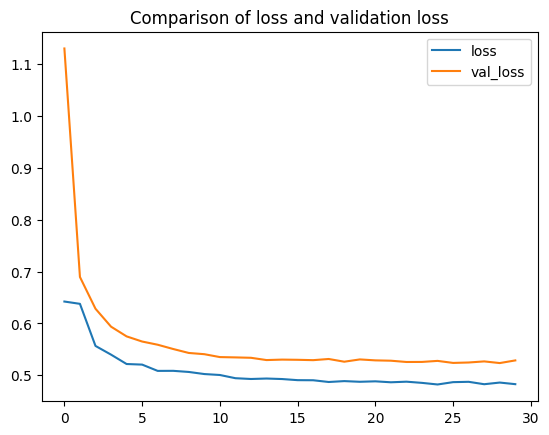

In [61]:
# transform into dataframe
metrics_imp = pd.DataFrame(history_imp.history)
# plot loss dan validation loss
metrics_imp[['loss', 'val_loss']].plot()
plt.title('Comparison of loss and validation loss')
plt.show()

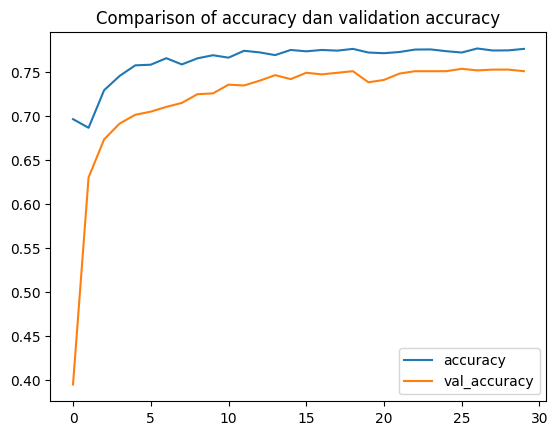

In [62]:
# plot accuracy dan validation accuracy
metrics_imp[['accuracy', 'val_accuracy']].plot()
plt.title('Comparison of accuracy dan validation accuracy')
plt.show()

In [63]:
# predict data train
y_pred_imp = model_imp.predict(X_train_final)
# set threshold 0.5
y_pred_imp = np.where(y_pred_imp >= 0.5, 1, 0)
# result from classification report
print(classification_report(y_train_balanced, y_pred_imp))

204/204 [==============================] - 0s 786us/step
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      3261
           1       0.74      0.85      0.79      3261

    accuracy                           0.78      6522
   macro avg       0.78      0.78      0.78      6522
weighted avg       0.78      0.78      0.78      6522



In [64]:
# predict data train
y_pred_imp_test = model_imp.predict(X_test_final)
# set threshold 0.5
y_pred_imp_test = np.where(y_pred_imp_test >= 0.5, 1, 0)
# result from classification report
print(classification_report(y_test, y_pred_imp_test))

44/44 [==============================] - 0s 891us/step
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      1022
           1       0.53      0.83      0.64       367

    accuracy                           0.76      1389
   macro avg       0.72      0.78      0.73      1389
weighted avg       0.82      0.76      0.77      1389



The model has been improvmented with

- added kernel initializer (weight) to input and hidden layers using he_uniform. these weights do variance scaling (ref: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeUniform)
- added a drop out rate whose value increases with each layer
- increased the epoch value from 10 to 30
- Actually the result of an improved model if it is re-run the value will still change, but here it is done to further stabilize the model in these changes and minimize the occurrence of gradient desent (either vanishing or exploding)
- This improvement has also reduced the slightly overfit of the model.

## 7.2 Functional API

Make an improvment model from the previous Functional API.

In [65]:
# create model
# define input layer
input_func = tf.keras.layers.Input(19,)
# hidden layer 1
hidden_1 = tf.keras.layers.Dense(16, kernel_initializer='he_uniform')(input_func)
drop_1 = tf.keras.layers.Dropout(rate=0.1) (hidden_1)
# hidden layer 2
hidden_2 = tf.keras.layers.Dense(8, kernel_initializer='he_uniform')(drop_1)
drop_2 = tf.keras.layers.Dropout(rate=0.1) (hidden_2)
# output layer
output_func = tf.keras.layers.Dense(1, activation='sigmoid') (drop_2)
# define model
model_imp_func = tf.keras.Model(inputs=input_func, outputs=output_func)

#compile model
model_imp_func.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# training model with 30 epoch
history_imp_func = model_imp_func.fit(train_dataset, 
                            epochs=30, 
                            validation_data=(val_dataset),
                            verbose=1)

Epoch 1/30
102/102 [==============================] - 1s 3ms/step - loss: 1.0728 - accuracy: 0.6500 - val_loss: 1.9640 - val_accuracy: 0.3636
Epoch 2/30
102/102 [==============================] - 0s 1ms/step - loss: 0.8565 - accuracy: 0.6392 - val_loss: 1.0028 - val_accuracy: 0.5383
Epoch 3/30
102/102 [==============================] - 0s 1ms/step - loss: 0.6568 - accuracy: 0.6903 - val_loss: 0.8116 - val_accuracy: 0.6022
Epoch 4/30
102/102 [==============================] - 0s 1ms/step - loss: 0.5874 - accuracy: 0.7191 - val_loss: 0.7131 - val_accuracy: 0.6454
Epoch 5/30
102/102 [==============================] - 0s 1ms/step - loss: 0.5613 - accuracy: 0.7372 - val_loss: 0.6838 - val_accuracy: 0.6589
Epoch 6/30
102/102 [==============================] - 0s 1ms/step - loss: 0.5510 - accuracy: 0.7340 - val_loss: 0.6502 - val_accuracy: 0.6715
Epoch 7/30
102/102 [==============================] - 0s 1ms/step - loss: 0.5310 - accuracy: 0.7458 - val_loss: 0.6185 - val_accuracy: 0.6850
Epoch 

In the sequential model above, improvements are made by adding the number of hidden layers and also the number of neurons in the hidden layer. There is also an additional use of the he_uniform initializer.

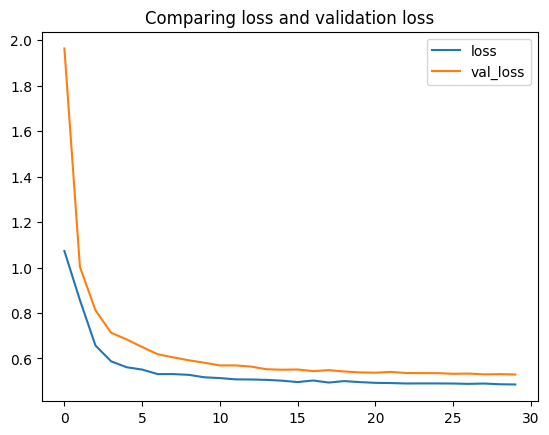

In [66]:
# change into dataframe
metrics_imp_func = pd.DataFrame(history_imp_func.history)
# plot loss dan validation loss
metrics_imp_func[['loss', 'val_loss']].plot()
plt.title('Comparing loss and validation loss')
plt.show()

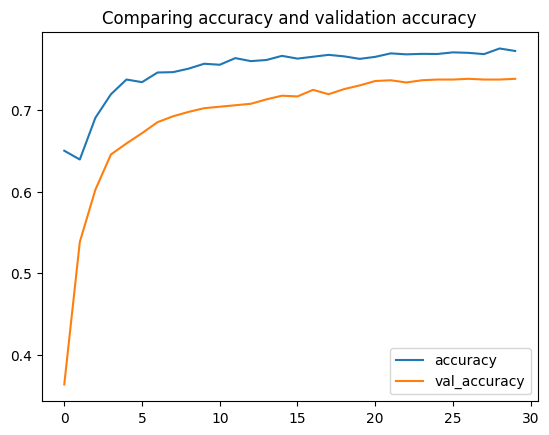

In [67]:
# plot accuracy dan validation accuracy
metrics_imp_func[['accuracy', 'val_accuracy']].plot()
plt.title('Comparing accuracy and validation accuracy')
plt.show()

Improvements have been made to the API functional model:

- In this model, the addition of a hidden layer is carried out
- Added a kernel initializer that is the same as the sequential model, namely he_uniform
- Using epoch = 30

In [68]:
# predict data train
y_pred_imp_fc = model_imp_func.predict(X_train_final)
# set threshold 0.5
y_pred_imp_fc = np.where(y_pred_imp_fc >= 0.5, 1, 0)
# result from classification report
print(classification_report(y_train_balanced, y_pred_imp_fc))

204/204 [==============================] - 0s 708us/step
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      3261
           1       0.74      0.85      0.79      3261

    accuracy                           0.78      6522
   macro avg       0.78      0.78      0.77      6522
weighted avg       0.78      0.78      0.77      6522



In [69]:
# predict data train
y_pred_imp_fc_test = model_imp_func.predict(X_test_final)
# set threshold 0.5
y_pred_imp_fc_test = np.where(y_pred_imp_fc_test >= 0.5, 1, 0)
# result from classification report
print(classification_report(y_test, y_pred_imp_fc_test))

44/44 [==============================] - 0s 768us/step
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1022
           1       0.52      0.83      0.64       367

    accuracy                           0.75      1389
   macro avg       0.72      0.78      0.73      1389
weighted avg       0.82      0.75      0.77      1389



# 8 - Model Saving

model saving which is used for model inference and model deployment. The best model chosen is the model that has been improved.


In [70]:
# saving scalar
with open('model_scaler.pkl', 'wb') as file_1:
    joblib.dump(scaler, file_1)

# saving encoder
with open('model_encoder.pkl', 'wb') as file_2:
    joblib.dump(encoder, file_2)

# saving numeric columns
with open('list_num_cols.txt', 'w') as file_3:
    json.dump(num_columns, file_3)

# saving categorical column
with open('list_cat_cols.txt', 'w') as file_4:
    json.dump(cat_columns, file_4)

In [71]:
# Summary of Model Sequential

model_imp_func.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense_7 (Dense)             (None, 16)                320       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 465
Trainable params: 465
Non-trainable param

In [72]:
# Freeze Model

model_imp_func.trainable = False
model_imp_func.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense_7 (Dense)             (None, 16)                320       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 465
Trainable params: 0
Non-trainable params:

In [73]:
# Save ANN Model

model_imp_func.save('model.final')

INFO:tensorflow:Assets written to: model.final/assets


INFO:tensorflow:Assets written to: model.final/assets


# 9 - Inference

In [74]:
# Load model
with open('model_scaler.pkl', 'rb') as file_1:
    model_scaler = joblib.load(file_1)

with open('model_encoder.pkl', 'rb') as file_2:
    model_encoder = joblib.load(file_2)

with open('list_num_cols.txt', 'r') as file_3:
    list_num_cols = json.load(file_3)

with open('list_cat_cols.txt', 'r') as file_4:
    list_cat_cols = json.load(file_4)

model_ann = load_model('model.final')    

In [75]:
# separates values ​​based on column type
data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

#scaling and encoding
data_inf_scaled = model_scaler.transform(data_inf_num) 
data_inf_encoded = model_encoder.transform(data_inf_cat)

# Concate Numerical Columns and Categorical Columns
data_inf_final = np.concatenate([data_inf_scaled, data_inf_encoded], axis=1)

In [76]:
# predict data inference
y_pred_inf = model_ann.predict(data_inf_final)
# set threshold 0.5
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)


4/4 [==============================] - 0s 2ms/step


In [77]:
# make the prediction results into a dataframe
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Churn Prediction'])

# Combine the Inference data with the predicate column
data_inf_predic = pd.concat([data_inf, y_pred_inf_df], axis=1)
data_inf_predic.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Prediction
0,Female,0,No,Yes,40,Yes,No,DSL,Yes,No,...,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),64.10,2460.35,0,0
1,Male,1,Yes,No,52,Yes,Yes,Fiber optic,Yes,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.20,5568.35,1,1
2,Male,1,Yes,No,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.30,70.30,1,1
3,Female,0,No,No,1,No,No phone service,DSL,No,No,...,Yes,No,No,Month-to-month,No,Mailed check,30.55,30.55,0,1
4,Female,0,Yes,Yes,72,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),64.45,4528.00,0,0


In [78]:
# count actual value of Churn
data_inf_predic["Churn"].value_counts()

0    81
1    19
Name: Churn, dtype: int64

In [79]:
# show Churn prediction
data_inf_predic["Churn Prediction"].value_counts()

0    67
1    33
Name: Churn Prediction, dtype: int64

Results of data inference:

- Models that have been saved and loaded for use in model inference have been successfully used.
- Of the 100 existing data, there are 24 incorrect data predictions. So the model has succeeded in predicting 76% of the inference data.
- This result is in accordance with the results of the functional model test which has been improved because the accuracy of the model is only 76%, so it has the same value.

# 10 - Overall Analysis

In Milestone 1, a Telco Customer Churn dataset is given which will predict whether a customer churns or not. The dataset consists of 7043 rows and 21 columns with categorical and numeric data types. Models created using Artificial Neural Network (ANN) with Sequential and Functional models.

**EDA**

- The total number of customers by gender is almost equal with a difference of 0.48 percent.
- The average length of time of customers leaves a Telco company is 17.9 months, and the average longevity of customers from Telco companies is 37.5 months
- average monthly cost of each leaving customer is USD 74.4, and the average monthly cost of each staying customer is USD 61.2, Maybe one of the causes of leaving customers is because the monthly charges are more expensive when compared to customers who don't leave.
- the average of total charges of each leaving customer is USD 1531.7, and the average of total charges for each staying customer is USD 2555.3, although the average total cost paid by surviving customers is higher than leaving customers, they are loyal to the company.
- Comparison of target labels is known to be balanced, but does not include extrem because labels 1 or yes have a total of 26.54%. So balance data is still considered medium. But the target data balance handling is carried out so that the model made is better.
- of the two types of customers, the number of customers who do not use tech support services is always more than those who use tech support services to help solve their problems. based on personal judgment that the customer who left was desperate with the existing problem, but was reluctant to contact the tech support service. Because it can be seen that the number of customers who stayed mostly used tech support services.

**Preprosessing** 

Before the data is entered into the model, data processing is first carried out as in feature selection, namely dropping the CustomerID column because it is considered to have no effect on customer churn or not based on ID or identity. Separate data inference, train, validation and test. Perform cleaning missing values ​​and outliers. Group numeric and categorical data. do the handling of imbalanced data by using SMOTENC then do the scaling and encoding.

**Model**

There are two models used to classify customer churn this time, namely the sequential model and also the functional model. Both models are formed with the same architecture, namely using 1 hidden layer with 4 neurons and 1 output layer with 1 neuron. Both models produce quite good performance as seen from the graphs of loss and accuracy during training which are quite good and also not overfit. For the classification report, we get the same accuracy for both models, namely 0.74.

The sequential and functional models that have been made earlier are tried to be improved by changing the hyperparameters. In the sequential model I didn't add the number of hidden layers, but I added the kernel initializer to he_unform, besides that the number of neurons was also changed to 8 in the hidden layer. I also changed the number of epochs from 10 to 30. The same changes were made to the functional model. But in the functional model I changed the hidden layer to 2. I also changed the number of neurons to 16 in the first hidden layer and in the second hidden layer to 8.

**Model Inference**

- Models that have been saved and loaded for use in model inference have been successfully used.
- Of the 100 existing data, there are 24 incorrect data predictions. So the model has succeeded in predicting 76% of the inference data.
- This result is in accordance with the results of the functional model test which has been improved because the accuracy of the model is only 76%, so it has the same value.

**suggestion**

Overall the model made is quite good and stable, but still needs to be explored to further improve the performance of the model both in terms of accuracy, speed and others. If we want to retain more customers, we should make a discount for new customers (make it 3 months contract), make tech-support access easier, while making our services more reliable, make better deals for yearly and 2 year contracts and have shorter term contracts like 3 or 6 month contracts.
